In [2]:
import pandas as pd 
import numpy as np
import math


bridges = pd.read_csv("bridges.csv", index_col = "id")
bridges.head()

,name,start_neighborhood,end_neighborhood,year_built,year_rehab,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,
2002832442,Fort Duquesne Blvd,Central Business District,NaN,NaN,NaN,NaN,Central Business District,6,2.0,42003020100,6.0,2.0,2.0,1-3,40.446450,-79.996537
761156487,28th Street Bridge,Strip District,Polish Hill,1931.0,1974.0,https://tools.wprdc.org/images/pittsburgh/brid...,Strip District,7,6.0,42003060500,6.0,6.0,2.0,2-25,40.456182,-79.973714
290122944,Second Avenue Bridge,Squirrel Hill South,Swisshelm Park,1886.0,1970.0,NaN,Swisshelm Park,5,14.0,42003141400,3.0,14.0,4.0,2-12,40.415210,-79.915699
1811170969,Alexander Street Bridge,West End,NaN,1924.0,2000.0,https://tools.wprdc.org/images/pittsburgh/brid...,West End,2,20.0,42003562600,5.0,20.0,6.0,1-17,40.440063,-80.033353
2047190591,Millvale Trail Pedestrian Bridge,Troy Hill,NaN,NaN,NaN,NaN,Troy Hill,1,24.0,42003240600,1.0,24.0,1.0,1-1,40.466586,-79.977731


In [3]:
neighborhood = dict()

for index, row in bridges.iterrows():
    if row["neighborhood"] in neighborhood:
        neighborhood[row["neighborhood"]] = neighborhood[row["neighborhood"]] + 1
    else:
        neighborhood[row["neighborhood"]] = 1
        
print(neighborhood)

{'Central Business District': 12, 'Strip District': 1, 'Swisshelm Park': 2, 'West End': 4, 'Troy Hill': 7, 'Squirrel Hill South': 14, 'Brookline': 1, 'Overbrook': 6, 'Arlington': 2, 'Oakwood': 5, 'Bloomfield': 2, 'Greenfield': 2, 'Polish Hill': 3, 'Lower Lawrenceville': 2, 'Brighton Heights': 2, 'Hays': 6, 'Beechview': 1, 'Banksville': 1, 'Shadyside': 6, 'Central Oakland': 1, 'Sheraden': 3, 'East Allegheny': 4, 'Manchester': 1, 'Mount Washington': 4, 'Larimer': 3, 'East Liberty': 2, 'Summer Hill': 1, 'Bon Air': 3, 'Bluff': 2, 'South Oakland': 4, 'Hazelwood': 4, 'Point Breeze': 1, 'Squirrel Hill North': 2, nan: 4, 'Allentown': 1, 'South Side Flats': 5, 'Spring Hill-City View': 1, 'Allegheny Center': 3, 'Lincoln-Lemington-Belmar': 2, 'Perry South': 2, 'Northview Heights': 1, 'South Side Slopes': 5, 'Allegheny West': 2, 'Homewood South': 1, 'Highland Park': 2, 'California-Kirkbride': 1, 'Marshall-Shadeland': 2, 'South Shore': 1, 'Esplen': 1, 'Elliott': 1, 'Regent Square': 1, 'Windgap': 2,

In [4]:
bridgescount = pd.DataFrame(list(neighborhood.items()), columns = ['neighborhood', '# of bridges'])
bridgescount_sorted = bridgescount.sort_values("# of bridges", ascending = True)
bridgescount_sorted.head(len(bridgescount))


,neighborhood,# of bridges
26,Summer Hill,1
50,Regent Square,1
49,Elliott,1
48,Esplen,1
47,South Shore,1
45,California-Kirkbride,1
43,Homewood South,1
40,Northview Heights,1
36,Spring Hill-City View,1
34,Allentown,1


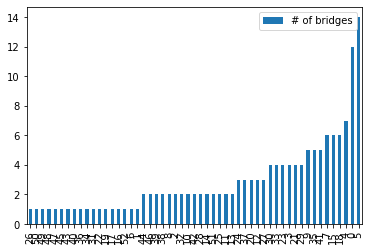

In [18]:
bridgescount_sorted.plot.bar()

In [17]:
best = bridgescount_sorted['neighborhood'].iloc[0:18]
bestnumber = bridgescount_sorted['# of bridges'].iloc[0]
print("The neighborhoods with the least bridges are")
print(best.to_string(index = False, name = False, dtype = False))
print("with", bestnumber, "bridge(s) and therefore are the best in this category.")

The neighborhoods with the least bridges are
          Summer Hill
        Regent Square
              Elliott
               Esplen
          South Shore
 California-Kirkbride
       Homewood South
    Northview Heights
Spring Hill-City View
            Allentown
         Point Breeze
           Manchester
      Central Oakland
           Banksville
            Beechview
          North Shore
            Brookline
       Strip District
with 1 bridge(s) and therefore are the best in this category.
